### Student Information
Name: 王泓文

Student ID: 107071006

GitHub ID: bluebird1337

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

### Begin Assignment Here

# Part 1
DM2021-Lab1-Solved.ipynb

# PART 2

In [354]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import scipy.sparse
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import warnings
warnings.filterwarnings('ignore')

In [169]:
# Data Preparation
categories = ['imdb', 'amazon', 'yelp']
imdb = {'sentences':[],
       'sentiments':[]}
amazon = {'sentences':[],
       'sentiments':[]}
yelp = {'sentences':[],
       'sentiments':[]}

#Amazon data
file1 = open('sentiment_labelled_sentences/amazon_cells_labelled.txt', 'r', encoding="utf-8")
Lines = file1.readlines()

for line in Lines:
    l_len = len(line)
    sentiment = line[int(l_len-2)] # last word is '\n', to avoid it we subtract by 2
    sentence = line.strip("10\n\t") # remove the leading and trailing characters
    amazon['sentences'].append(sentence)
    amazon['sentiments'].append(sentiment)
    
#imdb data
file1 = open('sentiment_labelled_sentences/imdb_labelled.txt', 'r', encoding="utf-8")
Lines = file1.readlines()

for line in Lines:
    l_len = len(line)
    sentiment = line[int(l_len-2)] # last word is '\n', to avoid it we subtract by 2
    sentence = line.strip("10\n\t") # remove the leading and trailing characters
    imdb['sentences'].append(sentence)
    imdb['sentiments'].append(sentiment)
    
#yelp data
file1 = open('sentiment_labelled_sentences/yelp_labelled.txt', 'r', encoding="utf-8")
Lines = file1.readlines()

for line in Lines:
    l_len = len(line)
    sentiment = line[int(l_len-2)] # last word is '\n', to avoid it we subtract by 2
    sentence = line.strip("10\n\t") # remove the leading and trailing characters
    yelp['sentences'].append(sentence)
    yelp['sentiments'].append(sentiment)

# Transform to dataframe
imdb_df = pd.DataFrame(imdb)
amazon_df = pd.DataFrame(amazon)
yelp_df = pd.DataFrame(yelp)

In [170]:
imdb_df[0:10]

,sentences,sentiments
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [171]:
#check for missing value
print(imdb_df.isnull().apply(lambda x: dmh.check_missing_values(x)))
print(amazon_df.isnull().apply(lambda x: dmh.check_missing_values(x)))
print(yelp_df.isnull().apply(lambda x: dmh.check_missing_values(x)))

                            sentences                          sentiments
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0
                            sentences                          sentiments
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0
                            sentences                          sentiments
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0


- As expected, there's no missing value in this dataset.

In [172]:
# Check for duplicates
print("imdb", sum(imdb_df.duplicated()))
print("amazon", sum(amazon_df.duplicated()))
print("yelp", sum(yelp_df.duplicated()))

imdb 3
amazon 10
yelp 4


In [173]:
# Drop duplicates
imdb_df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
amazon_df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
yelp_df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [174]:
# Check it again
print("imdb", sum(imdb_df.duplicated()))
print("amazon", sum(amazon_df.duplicated()))
print("yelp", sum(yelp_df.duplicated()))

imdb 0
amazon 0
yelp 0


In [175]:
# sampling
imdb_sample = imdb_df.sample(n=100)
amazon_sample = amazon_df.sample(n=100)
yelp_sample = yelp_df.sample(n=100)

print(imdb_sample.sentiments.value_counts())
print(amazon_sample.sentiments.value_counts())
print(yelp_sample.sentiments.value_counts())

0    50
1    50
Name: sentiments, dtype: int64
0    53
1    47
Name: sentiments, dtype: int64
1    53
0    47
Name: sentiments, dtype: int64


In [176]:
cop_dataset = [imdb_df, amazon_df, yelp_df]
cop_sample_dataset = [imdb_sample, amazon_sample, yelp_sample]

In [177]:
imdb_sample = imdb_sample.reset_index(drop=True)
amazon_sample = amazon_sample.reset_index(drop=True)
yelp_sample = yelp_sample.reset_index(drop=True)

In [178]:
positive = {'imdb':0,
            'amazon':0,
            'yelp':0}
negative = {'imdb':0,
            'amazon':0,
            'yelp':0}

for i in range(100):
    if imdb_sample['sentiments'][i] == '1':
        positive['imdb']+=1
    else: 
        negative['imdb']+=1
for i in range(100):
    if amazon_sample['sentiments'][i] == '1':
        positive['amazon']+=1
    else: 
        negative['amazon']+=1
for i in range(100):
    if yelp_sample['sentiments'][i] == '1':
        positive['yelp']+=1
    else: 
        negative['yelp']+=1

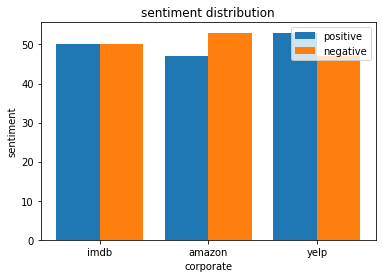

In [179]:
ax, figsize = (8,3)
# get the x labels
X_labels = ['imdb','amazon','yelp']

# get two of the y data
y_positive = positive.values()
y_negative = negative.values()

# use number to replace x_labels
X_axis = np.arange(len(X_labels))

# use numerical axis to shift, inorder to make comparision
plt.bar(X_axis - 0.2, y_positive, 0.4, label = 'positive')
plt.bar(X_axis + 0.2, y_negative, 0.4, label = 'negative')

# add some details to the graph
plt.xticks(X_axis, X_labels)
plt.xlabel("corporate")
plt.ylabel("sentiment")
plt.title("sentiment distribution")
plt.legend()
plt.show()

In [180]:
# Unigram
imdb_df['unigrams'] = imdb_df['sentences'].apply(lambda x: dmh.tokenize_text(x))
amazon_df['unigrams'] = amazon_df['sentences'].apply(lambda x: dmh.tokenize_text(x))
yelp_df['unigrams'] = yelp_df['sentences'].apply(lambda x: dmh.tokenize_text(x))

In [181]:
count_vect = CountVectorizer()
imdb_counts = count_vect.fit_transform(imdb_df.sentences)
amazon_counts = count_vect.fit_transform(amazon_df.sentences)
yelp_counts = count_vect.fit_transform(yelp_df.sentences)

In [182]:
print(imdb_counts.shape) 
print(amazon_counts.shape) 
print(yelp_counts.shape) 

(994, 3047)
(980, 1845)
(992, 2035)


In [183]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '15', '17', '1979', '20', '2007']

In [184]:
imdb_df['sentences'][0:5]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
Name: sentences, dtype: object

In [185]:
imdb_counts[0:1, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

we noticed that there's two '1' appear in this array, so we want to know what is that word

In [186]:
# get the wanted data
tmp = imdb_counts[0, 0:100].toarray()
target_feature = []

# Get all element that is not 0
for i in range(100):
    if tmp[0][i]!=0:
        target_feature.append(i)
        
# for each feature that is not 0, print the index and feature name of it
for target in target_feature:
    print(target, ":", count_vect.get_feature_names()[target])

37 : actually
92 : arepas


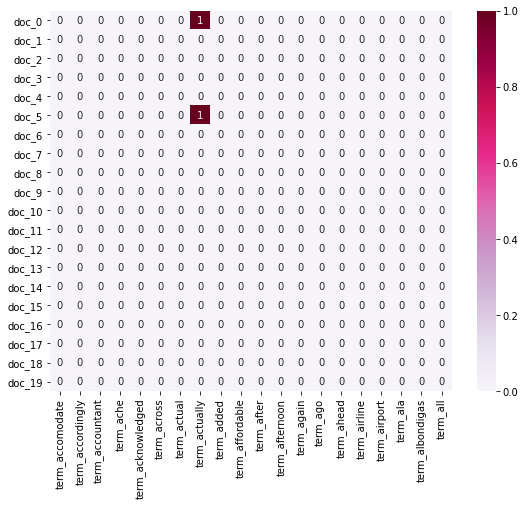

In [187]:
# heat map for sparse matrix
plot_x = ['term_' + str(i) for i in count_vect.get_feature_names()[30:50]] # since the first word appears at index-37
plot_y = ["doc_" + str(i) for i in range(0, 20)]
plot_z = imdb_counts[0:20, 30:50].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

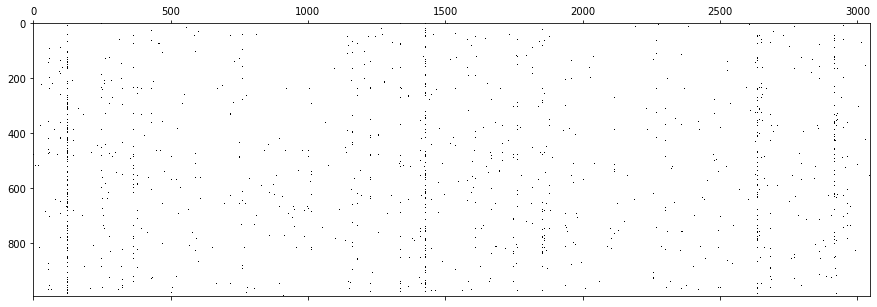

In [188]:
# Sparse matrix visualization
data = pd.DataFrame(imdb_counts.toarray())
plt.figure(figsize=(15, 15))
# use spy function to visualize it
plt.spy(data)

- We only got 2 attribute, no need to use PCA to reduce dimension

In [189]:
# Sum up the term frequency among different document
imdb_freq = np.asarray(imdb_counts.sum(axis=0))[0]
amazon_freq = np.asarray(amazon_counts.sum(axis=0))[0]
yelp_freq = np.asarray(yelp_counts.sum(axis=0))[0]

In [190]:
yelp_counts.sum(axis=0)

matrix([[1, 5, 2, ..., 2, 4, 5]], dtype=int64)

In [205]:
# Visualize it, using amazon dataset as example
tmp_x=pd.DataFrame(count_vect.get_feature_names()[:300])
tmp_y=pd.DataFrame(amazon_freq[:300])
term_frequencies_df = pd.concat([tmp_x, tmp_y], axis=1)
term_frequencies_df.columns = ["feature_names", "frequencies"]

fig = px.bar(term_frequencies_df, x='feature_names', y='frequencies')
fig.show()

In [201]:
# Sort the frequency
sort_df = term_frequencies_df.sort_values(['frequencies'], ascending=False).reset_index(drop=True)
fig = px.bar(sort_df, x='feature_names', y='frequencies')
fig.show()

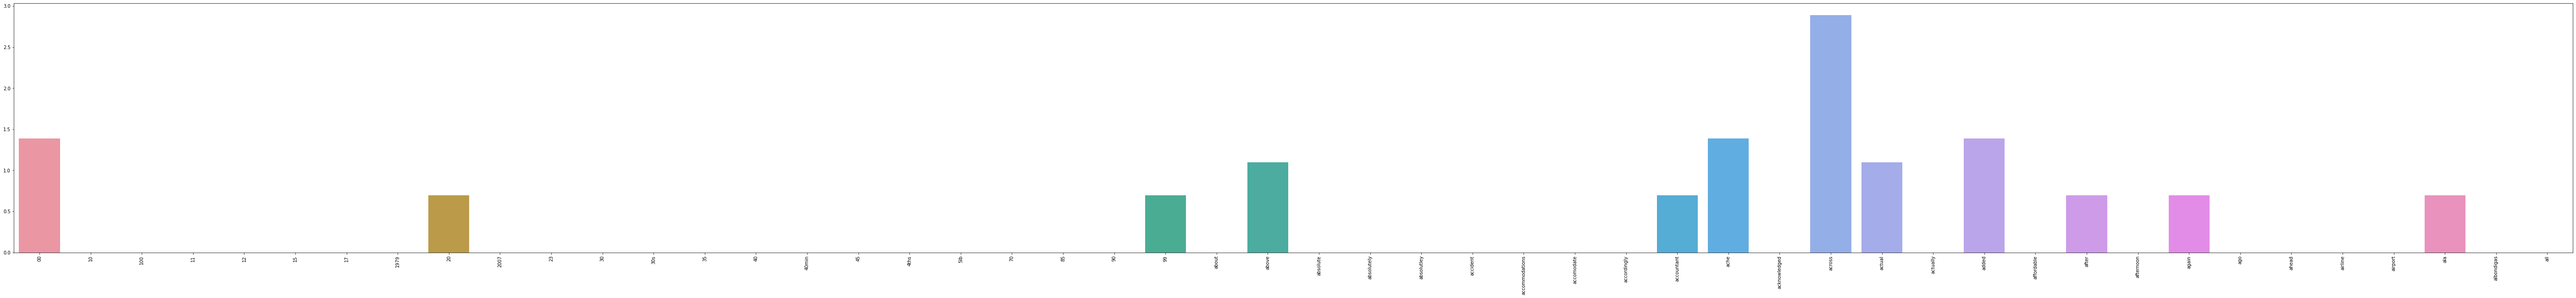

In [193]:
# Convert to log 
amazon_freq_log = [math.log(i) for i in amazon_freq]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:50],
                y=amazon_freq_log[:50])
g.set_xticklabels(count_vect.get_feature_names()[:50], rotation = 90);

In [194]:
# Discretization and Binarization
mlb = preprocessing.LabelBinarizer()
mlb.fit(imdb_df.sentiments)
mlb.classes_

array(['0', '1'], dtype='<U1')

- in this document, the category is already in binary(0 & 1), so no need to use one hot encoder or other technique to binarize it

In [195]:
# Data Exploration
document_to_transform_1 = []
random_record_1 = imdb_df.iloc[50]
random_record_1 = random_record_1['sentences'].strip()
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = amazon_df.iloc[100]
random_record_2 = random_record_2['sentences'].strip()
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = yelp_df.iloc[150]
random_record_3 = random_record_3['sentences'].strip()
document_to_transform_3.append(random_record_3)

In [196]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["I'm glad the film didn't go for the most obvious choice, as a lesser film certainly would have."]
['Buyer Beware, you could flush money right down the toilet.']
['My fiancé and I came in the middle of the day and we were greeted and seated right away.']


In [197]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [198]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.226455
Cosine Similarity using count bw 1 and 3: 0.217571
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Part 3

In [271]:
# Original dataset
cop_dataset = [imdb_df, amazon_df, yelp_df]
# Document term frequency matrix
freq_matrix = [imdb_counts, amazon_counts, yelp_counts]

Check each term, see how much they effect to the sentiment
- use each term as the parameters, and then use PCA(optional), to see which word has the decisive power of judge a sentences is positive or negative

In [214]:
# use this function to make token of every sentence
def tokenize(text):
    # transform to lower case
    text = text.lower()
    # seperate the words
    tokens = text.split()
    # remove the punctuation
    res = []
    punc = '!()-[]{};:"\,<">./?@#$%^&*_~'
    for token in tokens:
        for ele in token:
            if ele in punc:
                token = token.replace(ele, "")
        res.append(token)
    return res

In [278]:
# put every word and its corresponding sentiment into dataframe
word_sentiment_df = pd.DataFrame(columns=["words", "positve", "negative", "proportion"])

for data in cop_dataset:
    i_len = len(data['sentences'])
    for i in range(i_len):
        sentiment = data['sentiments'][i]
        tokens = tokenize(data['sentences'][i])
        for token in tokens:
            if sentiment == '1': 
                new_entry = {'words': token, 'positve': 1, 'negative': 0, 'proportion':0}
            else:
                new_entry = {'words': token, 'positve': 0, 'negative': 1, 'proportion':0}
            word_sentiment_df = word_sentiment_df.append(new_entry, ignore_index = True)

In [281]:
word_sentiment_df

,words,positve,negative,proportion
0,a,0,1,0
1,very,0,1,0
2,very,0,1,0
3,very,0,1,0
4,slowmoving,0,1,0
...,...,...,...,...
35349,took,0,1,0
35350,to,0,1,0
35351,bring,0,1,0
35352,the,0,1,0


In [290]:
# sum up the total sentiment for each word
final_df = word_sentiment_df.groupby(by='words').agg({'positve':'sum', 'negative':'sum', 'proportion':'first'})

In [297]:
# check the distribution 
f_df = final_df.copy()
f_df['sum'] = f_df['positve'] + f_df['negative']
f_df['proportion'] = f_df['positve'] / f_df['sum']
f_df = f_df.sort_values(by='proportion')

f_df.describe()

,positve,negative,proportion,sum
count,5441.000000,5441.000000,5441.000000,5441.000000
mean,3.235802,3.261900,0.511835,6.497703
std,22.928078,21.898293,0.439695,44.340213
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.500000,1.000000
75%,1.000000,1.000000,1.000000,3.000000
max,987.000000,949.000000,1.000000,1936.000000


<AxesSubplot:xlabel='proportion', ylabel='sum'>

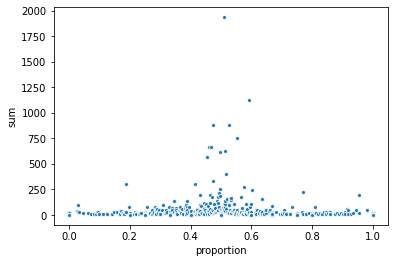

In [304]:
sns.scatterplot(x=f_df["proportion"], y=f_df["sum"], s=15)

# TD-IDF 

In [309]:
cop_dataset = [imdb_df, amazon_df, yelp_df]
corpus = []
# Combine all words into a list
for data in cop_dataset:
    for sen in data['sentences']:
        corpus.append(sen.strip())

In [318]:
# Use sk-learn module to create the sparse matrix
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vector.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [399]:
df

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Naive Bayes classifier part

In [332]:
# put y-label into the dataset
tfidf_with_sentiment = df.copy()
tfidf_with_sentiment['sentiment'] = ""

j=0
for data in cop_dataset:
    c_len = len(data['sentences'])
    for i in range(c_len):
        tfidf_with_sentiment['sentiment'][j] = data['sentiments'][i]
        j+=1
# make sentiment become the last columns of the dataframe
new_cols  = [col for col in tfidf_with_sentiment.columns if col != 'sentiment'] + ['sentiment']
tfidf_with_sentiment = tfidf_with_sentiment[new_cols]
tfidf_with_sentiment

,00,10,100,11,12,13,15,15g,15pm,17,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [397]:
# seperate data into X and Y
new_cols  = [col for col in tfidf_with_sentiment.columns if col != 'sentiment']
X = tfidf_with_sentiment[new_cols]
y = tfidf_with_sentiment['sentiment']

# Seperate it into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [398]:
X_train

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
2673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [381]:
y_train

2673    1
2486    0
2118    1
715     0
998     1
       ..
763     1
835     0
1653    1
2607    1
2732    0
Name: sentiment, Length: 2076, dtype: object

In [379]:
modelg=GaussianNB()
modelg.fit(X_train,y_train)
modelg.predict(X_test)

array(['1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0',
       '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0',
       '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0',
       '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1',
       '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
       '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0

In [341]:
# Naive Bayes classifier result (using TF-IDF as x parameter)
modelg.score(X_test,y_test)

0.698876404494382

In [388]:
# use word frequency features as x parameter
imdb_counts = count_vect.fit_transform(imdb_df.sentences)
term_cols = count_vect.get_feature_names()

imdb_nai_df = pd.DataFrame.sparse.from_spmatrix(imdb_counts, columns = term_cols)

In [389]:
imdb_nai_df['sentiment'] = imdb_df['sentiments']
# make sentiment become the last columns of the dataframe
new_cols  = [col for col in imdb_nai_df.columns if col != 'sentiment'] + ['sentiment']
imdb_nai_df = imdb_nai_df[new_cols]
imdb_nai_df

,10,12,13,15,15pm,17,18th,1928,1947,1948,...,younger,your,yourself,youthful,youtube,yun,zillion,zombie,zombiez,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [390]:
# seperate data into X and Y
new_cols = [col for col in imdb_nai_df.columns if col != 'sentiment']
X = imdb_nai_df[new_cols]
y = imdb_nai_df['sentiment']

# Seperate it into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [396]:
modelg=GaussianNB()
X_train_array = X_train.to_numpy()
y_train_array = y_train.to_numpy()
modelg.fit(X_train,y_train)
modelg.predict(X_test)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
# Naive Bayes classifier result (using TF-IDF as x parameter)
modelg.score(X_test,y_test)

I have no idea why can't I apply Naive Bayes module to the word frequency matrix....

but I think this two matrix have a major difference on how they are computed
- In TF-IDF we calculate both `Term frequency` and `Inverse document frequency` then multiply then together, so it become an huge array of float number, these floats number somehow represent their importance to that document
- In word frequency matrix, we just count how many time the word appears in that document, so it becomes a huge sparse matrix, contains only integer, also because each sentense is quiet short, so basically the array will filled with small number. Due to how we create the matrix, I think word frequency matrix is a much simplier version of TF-IDF matrix in decide the importance of each word to the deocument

# Part 4

In 5.2 Feature Creation, we create unigram by using nltk module, but appearently its very messy even after we tokenize all the text, I think in the tokenize process, we can filter some of the symbol, such as `'!()-[]{};:"\,<">./?@#$%^&*_~' `, also lowercase all the words. 

By doing 
> 1. remove punctuation 
> 2. lower the case


our dataset will be much more easy to read and handle

(optional: instead of only unigram, if we explore more on bi-gram, tri-gram...or even skip-gram, I think we can get more infomation about the entire corpus and do more analysis about it)

In 5.5 Atrribute Transformation / Aggregation:

In this subject, I think there might be some redundant code? 
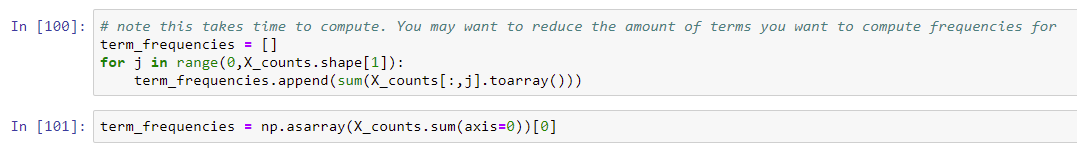
these two cell I think is doing the same job, and the second cell is obvious faster than the first cell, if we just want to sum up all the frequency among the document, I think by doing `.sum(axis=0)` is good enough

Also in the same subject, when we plot the barplot, 
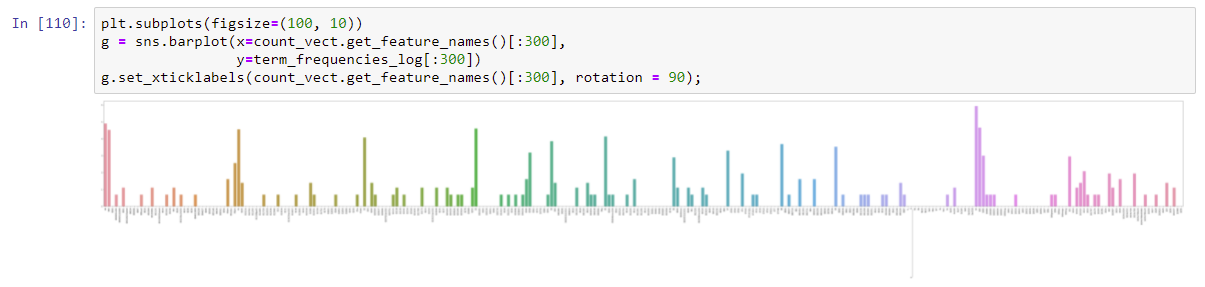
I think it's almost not convey any infomation cause it's wayyyy too small, if we can take the feature that' representitve and rotate the x-axis by 45 degrees, it might be better for every to understand what's going on.

(same for log)
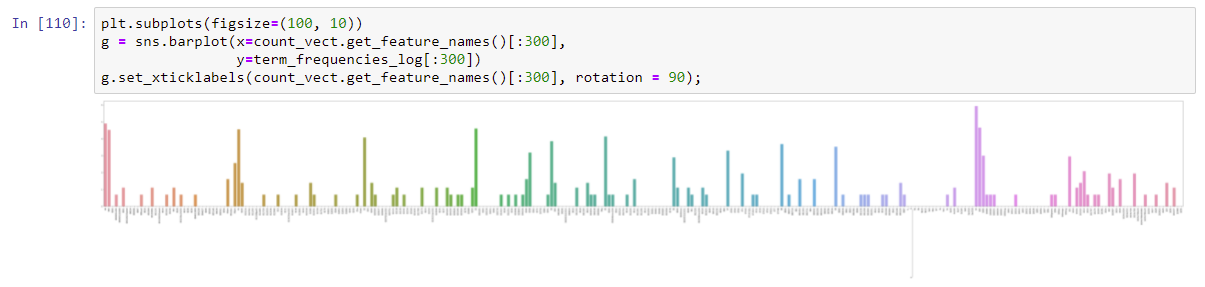

# Part 5

- I have add as much comments as I think it's neccessary for everyone to understand, also I think the method I use in both notebook is relative elementary to many of other extraordinary classmates, hope you can understand:)